In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df_calls = pd.read_csv('../data/processed/calls_2025_06_07.csv', index_col=0)
df_puts = pd.read_csv('../data/processed/puts_2025_06_07.csv', index_col=0)

df = pd.concat([df_calls, df_puts], ignore_index=True)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263423 entries, 0 to 263422
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   lastTradeDate      263423 non-null  object 
 1   strike             263423 non-null  float64
 2   lastPrice          263423 non-null  float64
 3   bid                263423 non-null  float64
 4   ask                263423 non-null  float64
 5   change             263423 non-null  float64
 6   percentChange      263373 non-null  float64
 7   volume             241778 non-null  float64
 8   openInterest       263423 non-null  float64
 9   impliedVolatility  263423 non-null  float64
 10  inTheMoney         263423 non-null  bool   
 11  contractSize       263423 non-null  object 
 12  currency           263423 non-null  object 
 13  expiration         263423 non-null  object 
 14  price              263423 non-null  float64
 15  duration           263423 non-null  int64  
 16  re

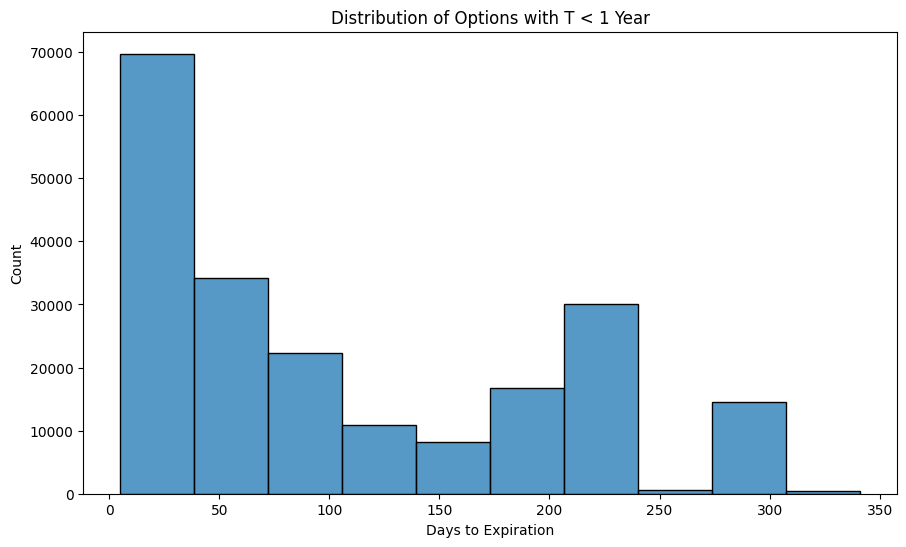

In [76]:
plt.figure(figsize=(10.5, 6))
sns.histplot(df[df['T'] < 1]['T'] * 365, bins=10)
plt.title("Distribution of Options with T < 1 Year")
plt.xlabel("Days to Expiration")
#plt.yscale("log")  # útil si hay mucha concentración en valores bajos
plt.show()

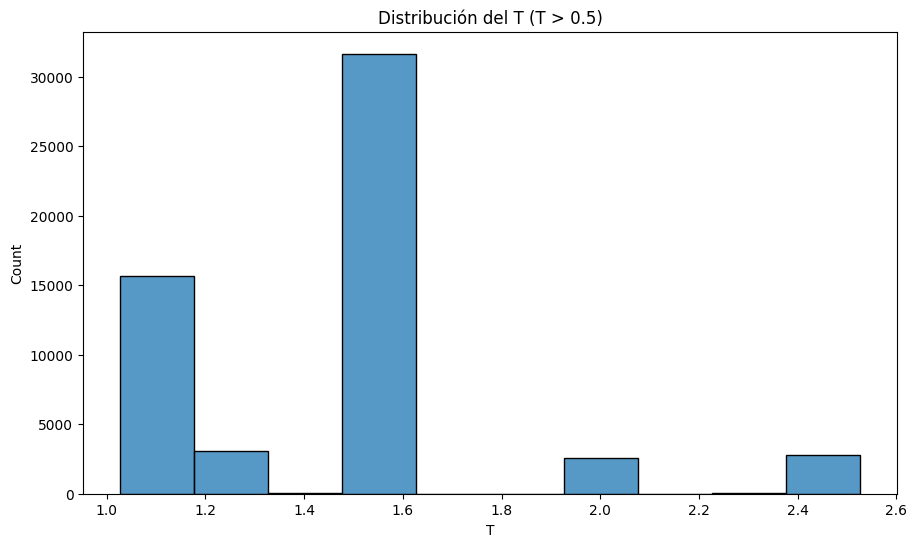

In [78]:
plt.figure(figsize=(10.5, 6))
sns.histplot(df[df['T'] > 1]['T'], bins=10)
plt.title("Distribución del T (T > 0.5)")
plt.xlabel("T")
#plt.yscale("log")  # útil si hay mucha concentración en valores bajos
plt.show()

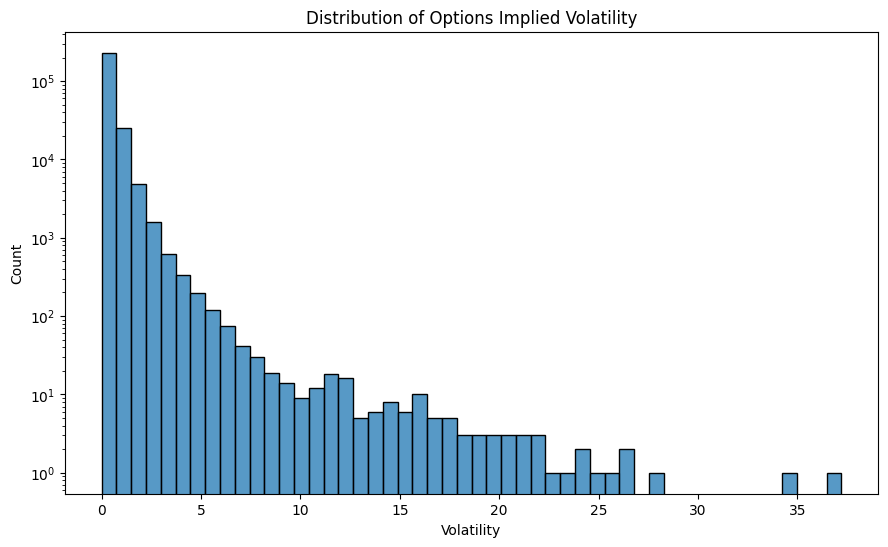

In [73]:
plt.figure(figsize=(10.5, 6))
sns.histplot(df['impliedVolatility'], bins=50)
plt.title("Distribution of Options Implied Volatility")
plt.xlabel("Volatility")
plt.yscale("log") 
plt.show()

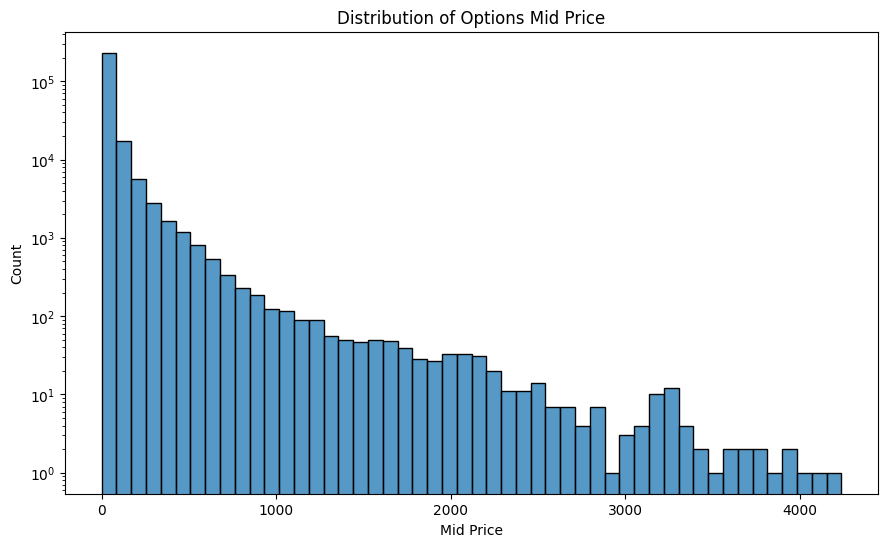

In [74]:
plt.figure(figsize=(10.5, 6))
sns.histplot(df['midPrice'], bins=50)
plt.title("Distribution of Options Mid Price")
plt.xlabel("Mid Price")
plt.yscale("log")  
plt.show()

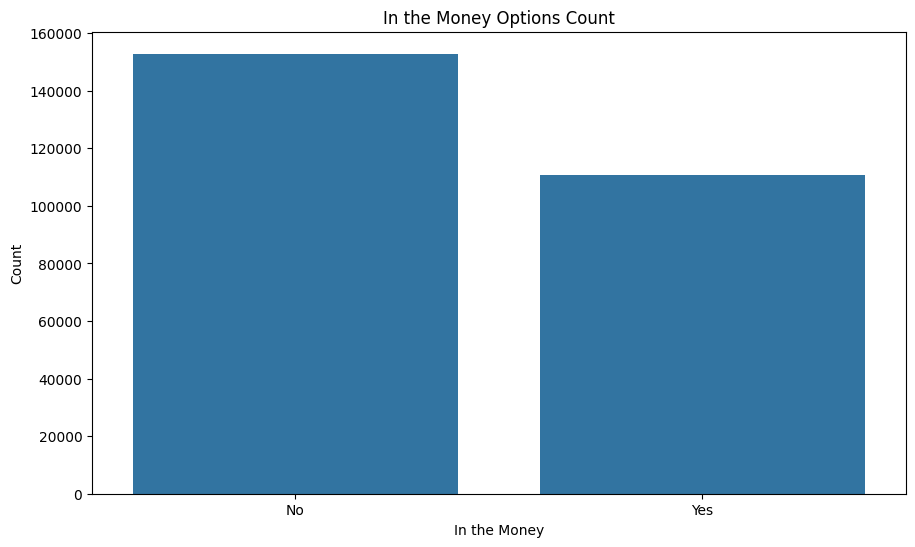

In [94]:
# Histogram of in the money options
df.value_counts = df['inTheMoney'].value_counts()
plt.figure(figsize=(10.5, 6))
sns.barplot(x=df.value_counts.index, y=df.value_counts.values)
plt.title("In the Money Options Count")
plt.xlabel("In the Money")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()




In [96]:
df['inTheMoney'].value_counts()

# Percentage of in the money options
in_the_money_percentage = df['inTheMoney'].mean() * 100
print(f"Percentage of in the money options: {in_the_money_percentage:.2f}%")
# Percentage of out of the money options
out_of_the_money_percentage = (1 - df['inTheMoney'].mean()) * 100
print(f"Percentage of out of the money options: {out_of_the_money_percentage:.2f}%")


Percentage of in the money options: 41.98%
Percentage of out of the money options: 58.02%
